In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [81]:
data = pd.read_excel("E:/code/project-list/bert-hfacs/data/external/subclass_hfacs_dataset.xlsx", sheet_name="Sheet1")

In [82]:
data.head()

,Teks,ER (LVL1),VIO (LVL1),EF (LVL2),CO (LVL2),PF (LVL2),Alasan
0,Berdasarkan hasil investigasi dan analisis dap...,NaN,1.0,NaN,NaN,NaN,"Unsafe Act-Violation, Karena mengganti cab mou..."
1,Faktor penyebab fatalitas awak truk trailer ta...,NaN,NaN,1.0,NaN,NaN,Precondition for Unsafe Act-Environmental Fact...
2,Berdasarkan hasil investigasi dan analisis dap...,NaN,NaN,1.0,NaN,NaN,Precondition for Unsafe Act-Environmental Fact...
3,Fatalitas korban terjadi karena pengemudi meng...,NaN,NaN,NaN,1.0,NaN,Precondition for Unsafe Act-Condition of Opera...
4,Pembantu pengemudi mengalami tidur sesaat / mi...,NaN,NaN,NaN,NaN,1.0,"Precondition for Unsafe Act-Personnel Factors,..."


In [83]:
sentences = data["Teks"]

In [84]:
data = data.fillna(0)

In [85]:
data["label"] = data[
    ["ER (LVL1)", "VIO (LVL1)", "EF (LVL2)", "CO (LVL2)", "PF (LVL2)"]
].values.tolist()

data = data.drop(
    columns=["ER (LVL1)", "VIO (LVL1)", "EF (LVL2)", "CO (LVL2)", "PF (LVL2)"]
)

In [86]:
data_subclass = data.copy()
data_subclass

,Teks,Alasan,label
0,Berdasarkan hasil investigasi dan analisis dap...,"Unsafe Act-Violation, Karena mengganti cab mou...","[0.0, 1.0, 0.0, 0.0, 0.0]"
1,Faktor penyebab fatalitas awak truk trailer ta...,Precondition for Unsafe Act-Environmental Fact...,"[0.0, 0.0, 1.0, 0.0, 0.0]"
2,Berdasarkan hasil investigasi dan analisis dap...,Precondition for Unsafe Act-Environmental Fact...,"[0.0, 0.0, 1.0, 0.0, 0.0]"
3,Fatalitas korban terjadi karena pengemudi meng...,Precondition for Unsafe Act-Condition of Opera...,"[0.0, 0.0, 0.0, 1.0, 0.0]"
4,Pembantu pengemudi mengalami tidur sesaat / mi...,"Precondition for Unsafe Act-Personnel Factors,...","[0.0, 0.0, 0.0, 0.0, 1.0]"
...,...,...,...
214,Dari hasil investigasi ditemukan bahwa penyeba...,"Unsafe Act-Violations, karena pelanggaran isi ...","[0.0, 1.0, 0.0, 0.0, 0.0]"
215,Dari hasil investigasi ditemukan bahwa penyeba...,"Precondition for Unsafe Act-Personnel Factors,...","[0.0, 0.0, 0.0, 0.0, 1.0]"
216,Dari hasil investigasi ditemukan bahwa penyeba...,Precondition for Unsafe Act-Condition of Opera...,"[0.0, 0.0, 0.0, 1.0, 0.0]"
217,Kecelakaan yang terjadi pada mobil bus disebab...,"Precondition for Unsafe Act-Personnel Factors,...","[0.0, 0.0, 0.0, 0.0, 1.0]"


In [87]:
# Define the mapping dictionary for converting the one-hot encoded labels to their respective categories
label_mapping = {
    "[1.0, 0.0, 0.0, 0.0, 0.0]": "ER",
    "[0.0, 1.0, 0.0, 0.0, 0.0]": "VIO",
    "[0.0, 0.0, 1.0, 0.0, 0.0]": "EF",
    "[0.0, 0.0, 0.0, 1.0, 0.0]": "CO",
    "[0.0, 0.0, 0.0, 0.0, 1.0]": "PF",
}

data_subclass["label"] = data_subclass["label"].astype(str)

# Apply the label mapping
data_subclass["label"] = data_subclass["label"].map(label_mapping)


In [88]:
import matplotlib.pyplot as plt

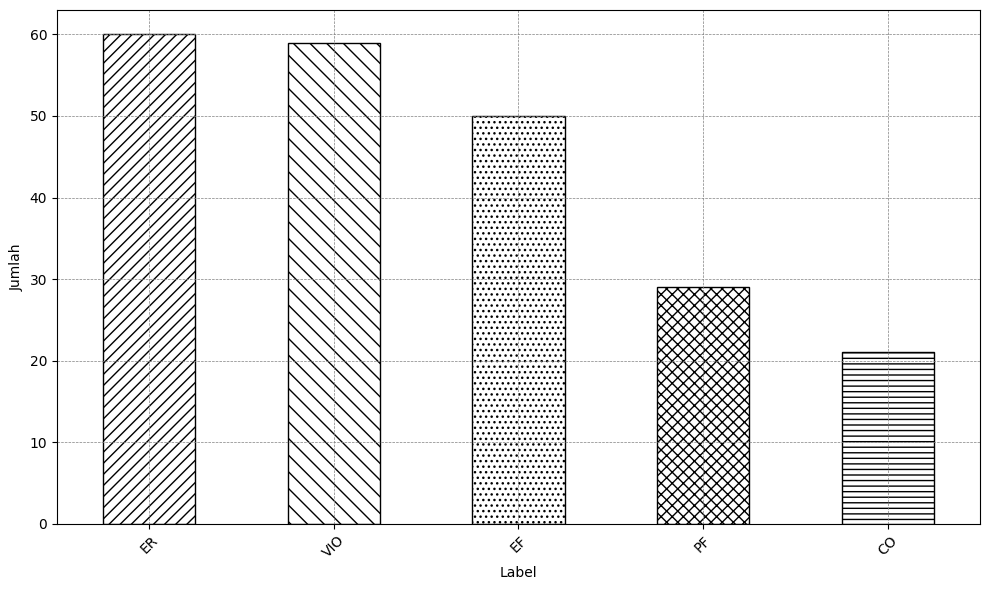

In [89]:
import matplotlib.pyplot as plt

# Menghitung jumlah label
label_counts = data_subclass['label'].copy().value_counts()

# Mendefinisikan pola yang berbeda untuk setiap label
hatch_patterns = {
    'ER': '///',  # Garis diagonal
    'VIO': '\\\\',  # Garis diagonal terbalik
    'EF': '...',   # Titik
    'PF': 'xxx',   # X
    'CO': '---'    # Garis horizontal
}

# Membuat plot
plt.figure(figsize=(10, 6))
bars = label_counts.plot(kind='bar', color='white', edgecolor='black')

# Menambahkan pola pada setiap batang
for i, bar in enumerate(bars.patches):
    label = label_counts.index[i]
    bar.set_hatch(hatch_patterns[label])  # Menambahkan pola sesuai label

# Menambahkan judul dan label
plt.xlabel('Label', color='black')
plt.ylabel('Jumlah', color='black')

plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray', zorder=2)  # Grid horizontal
plt.grid(True, axis='x', linestyle='--', linewidth=0.5, color='gray', zorder=2)  # Grid vertikal

# Mengatur rotasi label sumbu X dan layout
plt.xticks(rotation=45, color='black')
plt.yticks(color='black')
plt.tight_layout()

# Menampilkan plot
plt.show()

In [90]:
label_counts

label
ER     60
VIO    59
EF     50
PF     29
CO     21
Name: count, dtype: int64

In [91]:
data_class = data.copy()

In [92]:
data_class

,Teks,Alasan,label
0,Berdasarkan hasil investigasi dan analisis dap...,"Unsafe Act-Violation, Karena mengganti cab mou...","[0.0, 1.0, 0.0, 0.0, 0.0]"
1,Faktor penyebab fatalitas awak truk trailer ta...,Precondition for Unsafe Act-Environmental Fact...,"[0.0, 0.0, 1.0, 0.0, 0.0]"
2,Berdasarkan hasil investigasi dan analisis dap...,Precondition for Unsafe Act-Environmental Fact...,"[0.0, 0.0, 1.0, 0.0, 0.0]"
3,Fatalitas korban terjadi karena pengemudi meng...,Precondition for Unsafe Act-Condition of Opera...,"[0.0, 0.0, 0.0, 1.0, 0.0]"
4,Pembantu pengemudi mengalami tidur sesaat / mi...,"Precondition for Unsafe Act-Personnel Factors,...","[0.0, 0.0, 0.0, 0.0, 1.0]"
...,...,...,...
214,Dari hasil investigasi ditemukan bahwa penyeba...,"Unsafe Act-Violations, karena pelanggaran isi ...","[0.0, 1.0, 0.0, 0.0, 0.0]"
215,Dari hasil investigasi ditemukan bahwa penyeba...,"Precondition for Unsafe Act-Personnel Factors,...","[0.0, 0.0, 0.0, 0.0, 1.0]"
216,Dari hasil investigasi ditemukan bahwa penyeba...,Precondition for Unsafe Act-Condition of Opera...,"[0.0, 0.0, 0.0, 1.0, 0.0]"
217,Kecelakaan yang terjadi pada mobil bus disebab...,"Precondition for Unsafe Act-Personnel Factors,...","[0.0, 0.0, 0.0, 0.0, 1.0]"


In [93]:
# Define the mapping dictionary for converting the one-hot encoded labels to their respective categories
label_mapping_class = {
    "[1.0, 0.0, 0.0, 0.0, 0.0]": "UA",
    "[0.0, 1.0, 0.0, 0.0, 0.0]": "UA",
    "[0.0, 0.0, 1.0, 0.0, 0.0]": "PRE",
    "[0.0, 0.0, 0.0, 1.0, 0.0]": "PRE",
    "[0.0, 0.0, 0.0, 0.0, 1.0]": "PRE",
}

data_class["label"] = data_class["label"].astype(str)

# Apply the label mapping
data_class["label"] = data_class["label"].map(label_mapping_class)

In [94]:
data_class = data_class.drop('Alasan', axis=1)

In [95]:
data_class = data_class.drop_duplicates()

In [96]:
data_class = data_class.rename(columns={'Teks': 'text'})

In [97]:
data_class

,text,label
0,Berdasarkan hasil investigasi dan analisis dap...,UA
1,Faktor penyebab fatalitas awak truk trailer ta...,PRE
2,Berdasarkan hasil investigasi dan analisis dap...,PRE
3,Fatalitas korban terjadi karena pengemudi meng...,PRE
4,Pembantu pengemudi mengalami tidur sesaat / mi...,PRE
...,...,...
211,Dengan demikian dapat disimpulkan bahwa kemung...,PRE
214,Dari hasil investigasi ditemukan bahwa penyeba...,UA
215,Dari hasil investigasi ditemukan bahwa penyeba...,PRE
217,Kecelakaan yang terjadi pada mobil bus disebab...,PRE


In [98]:
data_class = data_class.reset_index(drop=True)

In [ ]:
data_class.to_csv("E:/code/project-list/bert-hfacs/data/interim/data_hfacs.csv", index=False)

In [99]:
data_class

,text,label
0,Berdasarkan hasil investigasi dan analisis dap...,UA
1,Faktor penyebab fatalitas awak truk trailer ta...,PRE
2,Berdasarkan hasil investigasi dan analisis dap...,PRE
3,Fatalitas korban terjadi karena pengemudi meng...,PRE
4,Pembantu pengemudi mengalami tidur sesaat / mi...,PRE
...,...,...
189,Dengan demikian dapat disimpulkan bahwa kemung...,PRE
190,Dari hasil investigasi ditemukan bahwa penyeba...,UA
191,Dari hasil investigasi ditemukan bahwa penyeba...,PRE
192,Kecelakaan yang terjadi pada mobil bus disebab...,PRE


In [100]:
data_class.to_excel("E:/code/project-list/bert-hfacs/data/interim/data_hfacs.xlsx")

In [31]:
# Misalkan kolom label bernama 'label'  
label_counts_class = data_class['label'].copy().value_counts()
label_counts_class  

label
UA     106
PRE     88
Name: count, dtype: int64

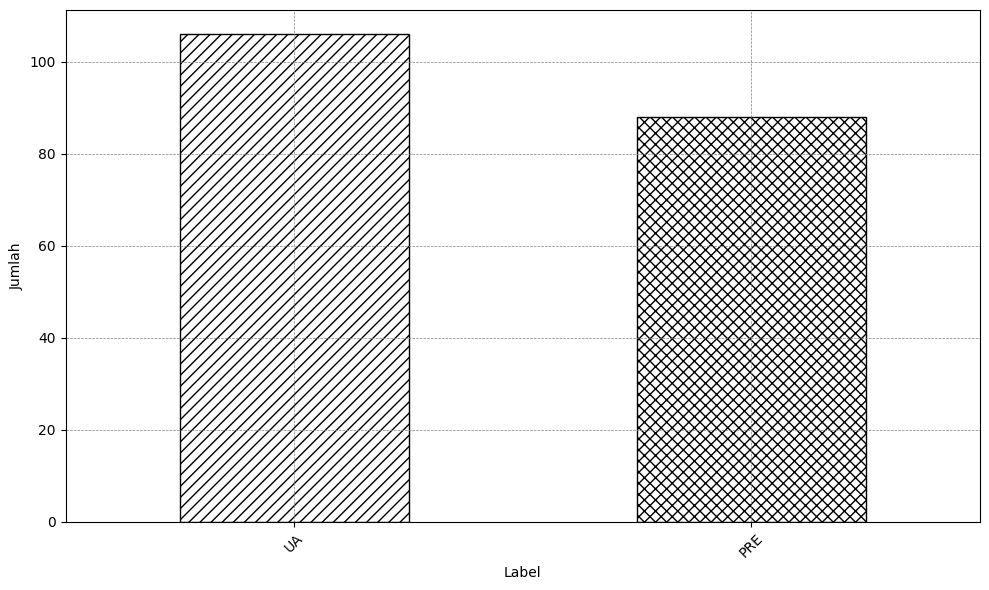

In [32]:
# Mendefinisikan pola yang berbeda untuk setiap label
hatch_patterns_class = {
    'UA': '///',  # Garis diagonal
    'PRE': 'xxx',  # Garis diagonal terbalik
}

# Membuat plot
plt.figure(figsize=(10, 6))
bars = label_counts_class.plot(kind='bar', color='white', edgecolor='black')

# Menambahkan pola pada setiap batang
for i, bar in enumerate(bars.patches):
    label = label_counts_class.index[i]
    bar.set_hatch(hatch_patterns_class[label])  # Menambahkan pola sesuai label

# Menambahkan judul dan label
plt.xlabel('Label', color='black')
plt.ylabel('Jumlah', color='black')

plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray', zorder=2)  # Grid horizontal
plt.grid(True, axis='x', linestyle='--', linewidth=0.5, color='gray', zorder=2)  # Grid vertikal

# Mengatur rotasi label sumbu X dan layout
plt.xticks(rotation=45, color='black')
plt.yticks(color='black')
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
def split_data(data):
    # train test split
    train_dataset, test_dataset = train_test_split(
        data, test_size=0.2, stratify=data["label"], random_state=1
    )

    print(f"Train shape: {train_dataset.shape}")
    print(f"Test shape: {test_dataset.shape}")

    # export to excel
    train_dataset.to_excel(
        "E:/code/project-list/bert-hfacs/data/interim/train_before_preprocessed.xlsx", 
        index=False
    )
    
    test_dataset.to_excel(
        "E:/code/project-list/bert-hfacs/data/interim/test_before_preprocessed.xlsx", 
        index=False
    )


    return train_dataset, test_dataset

In [ ]:
split_data(data_class)